# Math 104C Homework 1
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1
In the cell below I will solve the system using fourth order Runge-Kutta method on the interval $0 \leq t \leq 30$ with the step size $\Delta t = 0.1$ using the two different initial conditions $x(0) = 1, y(0) = 0.75$ and $\bar{x}(0) = 0.75, \bar{y}(0) = 0.25$.

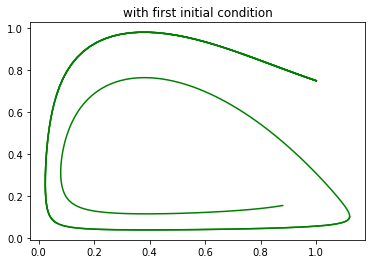

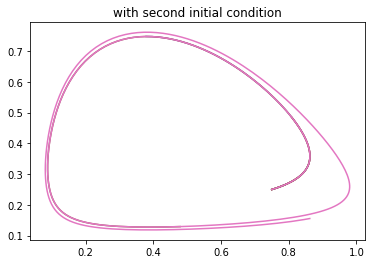

In [10]:
import numpy as np 
from matplotlib import pyplot as plt 
#interval of [0, 30]

def fx(x,y):
    equation = 1.2*x - (x**2) - ((x*y)/(x+0.2))
    return equation

def fy(x, y):
    equation = ((1.5*x*y)/(x+0.2)) - y
    return equation

def rko4(x0, y0, deltat, n):
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    for i in range(1, n):
        x_k1 = fx(x[i-1], y[i-1]) 
        y_k1 = fy(x[i-1], y[i-1])
        x_k2 = fx(x[i-1] + 0.5 * deltat * x_k1, y[i-1] + 0.5 * deltat * y_k1)
        y_k2 = fy(x[i-1] + 0.5 * deltat * x_k1, y[i-1] + 0.5 * deltat * y_k1)
        x_k3 = fx(x[i-1] + 0.5 * deltat * x_k2, y[i-1] + 0.5 * deltat * y_k2)
        y_k3 = fy(x[i-1] + 0.5 * deltat, y[i-1] + 0.5 * deltat * y_k2)
        x_k4 = fx(x[i-1] + deltat * x_k3, y[i-1] + deltat * y_k3)
        y_k4 = fy(x[i-1] + deltat * x_k3, y[i-1] + deltat * y_k3)
        x.append(x[i-1] + (deltat/6)*(x_k1 + 2*x_k2 + 2*x_k3 + x_k4))
        y.append(y[i-1] + (deltat/6)*(y_k1 + 2*y_k2 + 2*y_k3 + y_k4))
    return x, y

x0_1    = 1
y0_1    = .75
x0_2    = .75
y0_2    = .25
tf      = 30
n       = [4, 8, 16, 32, 64, 128, 301]
deltat  = 0.1

#initial condition 1 
x_1 = [] 
y_1 = []

#initial condition 2
x_2 = []
y_2 = []

for i in range (len(n)):
    #inital condition 1
    tempx1, tempy1 = rko4(x0_1, y0_1, deltat, n[i])
    x_1.append(tempx1)
    y_1.append(tempy1)
    
    #initial condition 2
    tempx2, tempy2 = rko4(x0_2, y0_2, deltat, n[i])
    x_2.append(tempx2)
    y_2.append(tempy2)
    
for i in range(len(x_1)):
    plt.plot(x_1[i], y_1[i], color = "green")

plt.title("with first initial condition")
plt.show()

for i in range(len(x_2)):
    plt.plot(x_2[i], y_2[i])
plt.title("with second initial condition")
plt.show()


These two plots give a visual representation of how there is always more prey than predators. The number of predators increase when there is more prey and reduces with less prey, the maintenance of balance thus creates a cycle. 

## Exercise 2
Given the explicit midpoint RK method for IVP $y' = f(t, y(t)), 0<t\leq T, y(0) = \alpha$ where $f$ is continuious and Lipschitz in $y$ in $D = \{(t,y):0\leq t \leq T, y \in \mathbb{R}\}$. Substitute $K_2$ for $y_{n+1}$ equation results in $y_{n+1} = y_n + \Delta t(f(t_n + \frac{\Delta t}{2}, y_n + \frac{\Delta t}{2}(f(t_n, y_n)))$. Note $\Delta t = k$.<br/><br/>

Our increment function in this case is $$\Phi(t, y, k) = f(t+\frac{k}{2}, y+\frac{k}{2}f(t, y))$$<br/>
Let us suppose that $\Phi$ is Lipschitz in $y$, i.e. there is $L \geq 0$ such that $$|\Phi(t, y_1, k) - \Phi(t, y_2, k)| \leq L|y_1- y_2|$$ <br/><br/>

Therefore, 
$$\begin{align}
|\Phi(t, y_1, k) - \Phi(t, y_2, k)| &= \left|f\left(t + \frac{k}{2}, y_1+\frac{k}{2}f(t, y_1)\right) - f\left(t + \frac{k}{2}, y_2 + \frac{k}{2}f(t, y_2)\right)\right|\\
&\leq L\left|y_1 + \frac{k}{2}f(t,y_1)-y_2-\frac{k}{2}f(t,y_2)\right|\\
&\leq L|y_1 - y_2| +\frac{k}{2}L|f(t,y_1)-f(t, y_2)|\\
&\leq \left(1 + \frac{k}{2}L\right)L|y_1-y_2|\leq \tilde{L}|y_1-y_2|
\end{align}$$
where $\tilde{L} = (1 + \frac{k_0}{2}L)L$ and $k \leq k_0$, i.e. for sufficiently small $k$. This shows that $\Phi$ is Lipschitz in y and since the midpoint RK method is of order 2 (provided we have $K_2$), it's consistent and converges to the solution of IVP.
